In [27]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import glob

In [35]:
folder = "./../data/"
csv_files = glob.glob(os.path.join(folder, "*.csv"))
tickers_l = [os.path.basename(f.upper()).split("_")[0] for f in csv_files]
tickers_str = ", ".join(tickers_l)

RISK QUANTIFICATION RESULTS – 100 simulations

Simulation performed on portfolio of PEP, XLF, SOXX, SPY, OBSERVED, AAPL, KO, MCD, QQQ


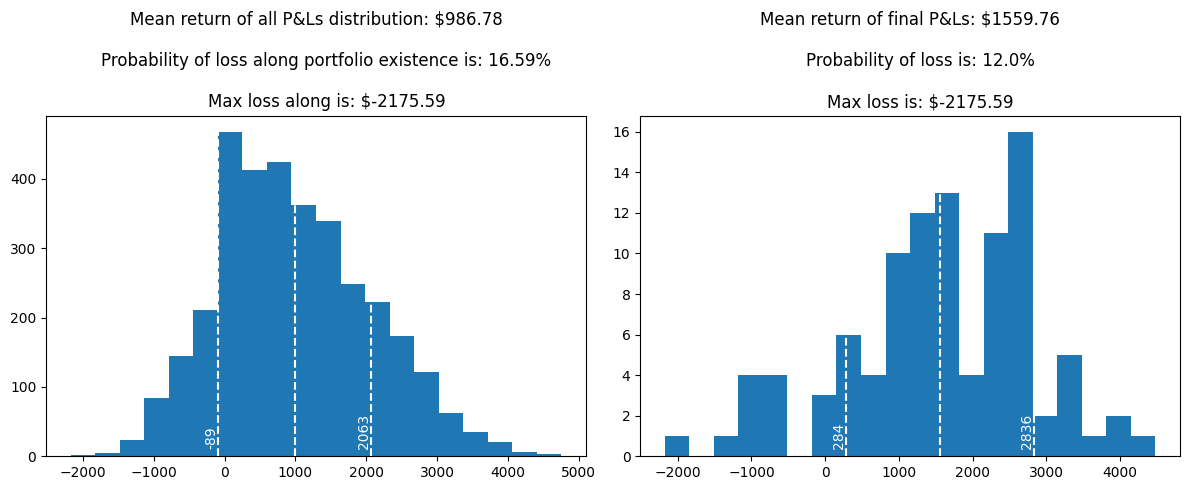

In [37]:
with open("./simulations/mc_simulation_pnls.json") as file:
    mc_sim_results = json.load(file)

print(f"RISK QUANTIFICATION RESULTS – {len(mc_sim_results)} simulations")
print(f"\nSimulation performed on portfolio of {tickers_str}")

mc_sim_all_pnls_distribution = np.array([x for row in mc_sim_results for x in row], dtype=float)
mc_sim_final_pnls = np.array([ar[-1] for ar in mc_sim_results], dtype=float)

pure_prob_of_loss = round((len(mc_sim_all_pnls_distribution[mc_sim_all_pnls_distribution < 0]) / len(mc_sim_all_pnls_distribution)) * 100, 2)
pure_prob_of_loss_final_pnls = round((len(mc_sim_final_pnls[mc_sim_final_pnls < 0]) / len(mc_sim_final_pnls)) * 100, 2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First chart
lower_std = round(mc_sim_all_pnls_distribution.mean() - mc_sim_all_pnls_distribution.std())
upper_std = round(mc_sim_all_pnls_distribution.mean() + mc_sim_all_pnls_distribution.std())
axes[0].hist(mc_sim_all_pnls_distribution, bins=20)
axes[0].axvline(x=lower_std, color="white", linestyle="--")
axes[0].axvline(x=upper_std, color="white", linestyle="--")
axes[0].axvline(x=round(mc_sim_all_pnls_distribution.mean(), 2), color="white", linestyle="--")
ymin, ymax = axes[0].get_ylim()
margin = (ymax - ymin) * 0.02
axes[0].text(lower_std, ymin + margin, str(lower_std), rotation=90, va="bottom", ha="right", color="white")
axes[0].text(upper_std, ymin + margin, str(upper_std), rotation=90, va="bottom", ha="right", color="white")
axes[0].set_title(
    f"""Mean return of all P&Ls distribution: ${round(mc_sim_all_pnls_distribution.mean(), 2)}\n
    Probability of loss along portfolio existence is: {pure_prob_of_loss}%\n
    Max loss along is: ${round(mc_sim_all_pnls_distribution[mc_sim_all_pnls_distribution < 0].min(), 2)}"""
)

# Second chart
lower_std = round(mc_sim_final_pnls.mean() - mc_sim_final_pnls.std())
upper_std = round(mc_sim_final_pnls.mean() + mc_sim_final_pnls.std())
axes[1].hist(mc_sim_final_pnls, bins=20)
axes[1].axvline(x=lower_std, color="white", linestyle="--")
axes[1].axvline(x=upper_std, color="white", linestyle="--")
axes[1].axvline(x=round(mc_sim_final_pnls.mean(), 2), color="white", linestyle="--")
ymin, ymax = axes[1].get_ylim()
margin = (ymax - ymin) * 0.02
axes[1].text(lower_std, ymin + margin, str(lower_std), rotation=90, va="bottom", ha="right", color="white")
axes[1].text(upper_std, ymin + margin, str(upper_std), rotation=90, va="bottom", ha="right", color="white")
#axes[1].text(round(mc_sim_final_pnls.mean(), 2), ymin + margin, str(round(mc_sim_final_pnls.mean(), 2)), rotation=90, va="bottom", ha="right", color="white")
axes[1].set_title(
    f"""Mean return of final P&Ls: ${round(mc_sim_final_pnls.mean(), 2)}\n
    Probability of loss is: {pure_prob_of_loss_final_pnls}%\n
    Max loss is: ${round(mc_sim_final_pnls[mc_sim_final_pnls < 0].min(), 2)}"""
)

plt.tight_layout()
plt.show()

In [26]:
loss_threshold = -1000
max_loss_prob = round((len(mc_sim_final_pnls[mc_sim_final_pnls < loss_threshold]) / len(mc_sim_final_pnls)) * 100, 2)
print(f"Probability of final loss being greater than {loss_threshold} USD is {max_loss_prob}%.")

Probability of final loss being greater than -1000 USD is 4.0%.


STRESS TESTING RESULTS – 1000 simulations

Simulation performed on portfolio of PEP, XLF, SOXX, SPY, OBSERVED, AAPL, KO, MCD, QQQ


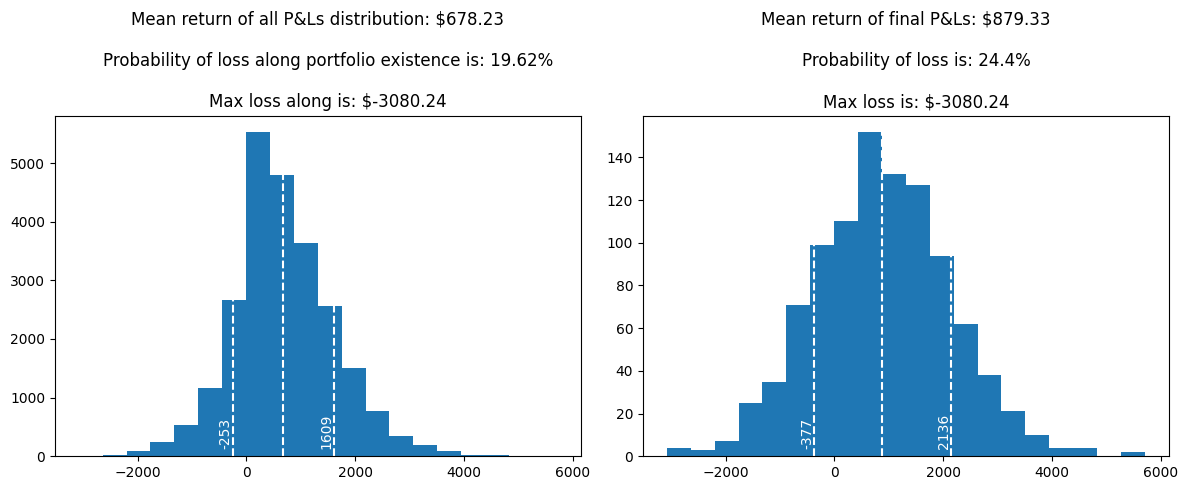

In [38]:
with open("./simulations/stress_testing_pnls.json") as file:
    st_sim_results = json.load(file)

print(f"STRESS TESTING RESULTS – {len(st_sim_results)} simulations")
print(f"\nSimulation performed on portfolio of {tickers_str}")

st_sim_all_pnls_distribution = np.array([x for row in st_sim_results for x in row], dtype=float)
st_sim_final_pnls = np.array([ar[-1] for ar in st_sim_results], dtype=float)

pure_prob_of_loss = round((len(st_sim_all_pnls_distribution[st_sim_all_pnls_distribution < 0]) / len(st_sim_all_pnls_distribution)) * 100, 2)
pure_prob_of_loss_final_pnls = round((len(st_sim_final_pnls[st_sim_final_pnls < 0]) / len(st_sim_final_pnls)) * 100, 2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First chart
lower_std = round(st_sim_all_pnls_distribution.mean() - st_sim_all_pnls_distribution.std())
upper_std = round(st_sim_all_pnls_distribution.mean() + st_sim_all_pnls_distribution.std())
axes[0].hist(st_sim_all_pnls_distribution, bins=20)
axes[0].axvline(x=lower_std, color="white", linestyle="--")
axes[0].axvline(x=upper_std, color="white", linestyle="--")
axes[0].axvline(x=round(st_sim_all_pnls_distribution.mean(), 2), color="white", linestyle="--")
ymin, ymax = axes[0].get_ylim()
margin = (ymax - ymin) * 0.02
axes[0].text(lower_std, ymin + margin, str(lower_std), rotation=90, va="bottom", ha="right", color="white")
axes[0].text(upper_std, ymin + margin, str(upper_std), rotation=90, va="bottom", ha="right", color="white")
axes[0].set_title(
    f"""Mean return of all P&Ls distribution: ${round(st_sim_all_pnls_distribution.mean(), 2)}\n
    Probability of loss along portfolio existence is: {pure_prob_of_loss}%\n
    Max loss along is: ${round(st_sim_all_pnls_distribution[st_sim_all_pnls_distribution < 0].min(), 2)}"""
)

# Second chart
lower_std = round(st_sim_final_pnls.mean() - st_sim_final_pnls.std())
upper_std = round(st_sim_final_pnls.mean() + st_sim_final_pnls.std())
axes[1].hist(st_sim_final_pnls, bins=20)
axes[1].axvline(x=lower_std, color="white", linestyle="--")
axes[1].axvline(x=upper_std, color="white", linestyle="--")
axes[1].axvline(x=round(st_sim_final_pnls.mean(), 2), color="white", linestyle="--")
ymin, ymax = axes[1].get_ylim()
margin = (ymax - ymin) * 0.02
axes[1].text(lower_std, ymin + margin, str(lower_std), rotation=90, va="bottom", ha="right", color="white")
axes[1].text(upper_std, ymin + margin, str(upper_std), rotation=90, va="bottom", ha="right", color="white")
axes[1].set_title(
    f"""Mean return of final P&Ls: ${round(st_sim_final_pnls.mean(), 2)}\n
    Probability of loss is: {pure_prob_of_loss_final_pnls}%\n
    Max loss is: ${round(st_sim_final_pnls[st_sim_final_pnls < 0].min(), 2)}"""
)

plt.tight_layout()
plt.show()

In [23]:
loss_threshold = -1000
max_loss_prob = round((len(st_sim_final_pnls[st_sim_final_pnls < loss_threshold]) / len(st_sim_final_pnls)) * 100, 2)
print(f"Probability of final loss being greater than {loss_threshold} USD is {max_loss_prob}%.")

Probability of final loss being greater than -1000 USD is 6.5%.
